In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [10]:
#Read the csv file
df = pd.read_csv('STRIPS_data.csv')

In [11]:
#Convert the 'Date' column to datetime format and sort by data in descending order
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date', ascending=False)

In [12]:
#Extract columns for Time to Maturity, Yield and Price
initial_time_to_maturity = df.iloc[0][[col for col in df.columns if col.startswith('Time_')]]
initial_yield = df.iloc[0][[col for col in df.columns if col.startswith('Yield_')]]
initial_price = df.iloc[0][[col for col in df.columns if col.startswith('Price_')]]

In [13]:
# Convert all data types to float
initial_time_to_maturity = initial_time_to_maturity.astype(float)
initial_yield = initial_yield.astype(float)
initial_price = initial_price.astype(float)

In [17]:
initial_yield

Yield_Feb2025    0.02520
Yield_May2025    0.04204
Yield_Aug2025    0.03694
Yield_Nov2025    0.04243
Yield_Feb2026    0.04081
Yield_May2026    0.04221
Yield_Aug2026    0.04088
Yield_Nov2026    0.03887
Yield_Feb2027    0.03973
Yield_May2027    0.04222
Yield_Aug2027    0.04169
Yield_Nov2027    0.04182
Yield_Feb2028    0.04252
Yield_May2028    0.04262
Yield_Aug2028    0.04157
Yield_Nov2028    0.04277
Yield_Feb2029    0.04173
Yield_May2029    0.04299
Yield_Aug2029    0.04289
Yield_May2030    0.04317
Yield_Aug2030    0.04354
Yield_Nov2030    0.04345
Yield_Feb2031    0.04357
Yield_May2031    0.04387
Yield_Aug2031    0.04403
Yield_Nov2031    0.04417
Yield_Feb2032    0.04419
Yield_May2032    0.04419
Yield_Aug2032    0.04431
Yield_Nov2032    0.04409
Yield_Feb2033    0.04448
Yield_May2033    0.04458
Yield_Aug2033    0.04464
Yield_Nov2033    0.04464
Yield_Feb2034    0.04483
Yield_May2034    0.04487
Yield_Aug2034    0.04495
Yield_Nov2034    0.04499
Yield_Feb2036    0.04371
Yield_Feb2037    0.04451


In [14]:
# Calculate spot rates
spot_rates = []

for ttm, price in zip(initial_time_to_maturity, initial_price):
    if ttm > 0 and price > 0:  # Avoid division by zero or negative values
        spot_rate = (100 / price) ** (1 / ttm) - 1
        spot_rates.append(spot_rate)
    else:
        spot_rates.append(np.nan)  # Handle invalid values gracefully

# Convert to pandas Series for better handling
spot_rates = pd.Series(spot_rates, index=initial_time_to_maturity.index)

# Print the results
print(spot_rates)


Time_Feb2025    0.022844
Time_May2025    0.042651
Time_Aug2025    0.048442
Time_Nov2025    0.042646
Time_Feb2026    0.041136
Time_May2026    0.042665
Time_Aug2026    0.041358
Time_Nov2026    0.039168
Time_Feb2027    0.040091
Time_May2027    0.042683
Time_Aug2027    0.042168
Time_Nov2027    0.042216
Time_Feb2028    0.042963
Time_May2028    0.043055
Time_Aug2028    0.042011
Time_Nov2028    0.043171
Time_Feb2029    0.042134
Time_May2029    0.043444
Time_Aug2029    0.043359
Time_May2030    0.043634
Time_Aug2030    0.044026
Time_Nov2030    0.043895
Time_Feb2031    0.044032
Time_May2031    0.044359
Time_Aug2031    0.044535
Time_Nov2031    0.044640
Time_Feb2032    0.044666
Time_May2032    0.044673
Time_Aug2032    0.044807
Time_Nov2032    0.044553
Time_Feb2033    0.044952
Time_May2033    0.045075
Time_Aug2033    0.045141
Time_Nov2033    0.045117
Time_Feb2034    0.045321
Time_May2034    0.045376
Time_Aug2034    0.045460
Time_Nov2034    0.045485
Time_Feb2036    0.044184
Time_Feb2037    0.044999


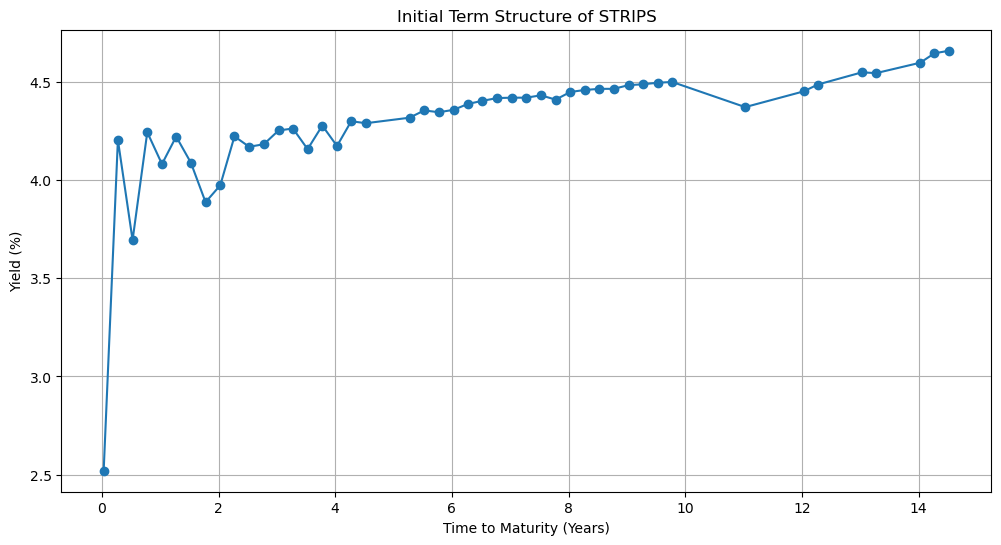

In [15]:
#Plot the initial term structure (Yield Vs Time to Maturity)
plt.figure(figsize=(12, 6))
plt.plot(initial_time_to_maturity, initial_yield*100, marker='o', label='Initial Term Structure')
plt.title('Initial Term Structure of STRIPS')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Yield (%)')
plt.grid(True)
plt.show()

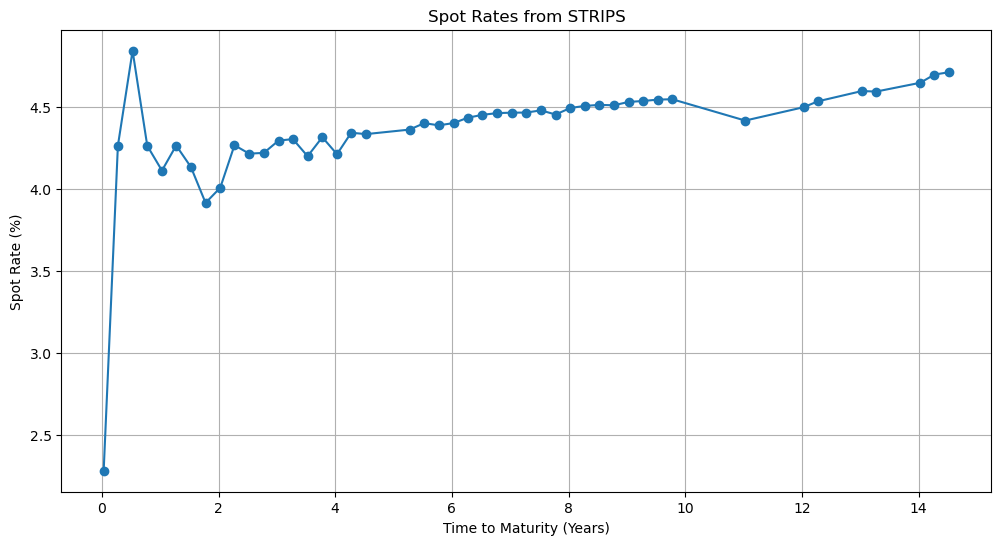

In [16]:
#Plot the spot rates
plt.figure(figsize=(12, 6))
plt.plot(initial_time_to_maturity, spot_rates * 100, marker='o', label='Spot Rates')
plt.title('Spot Rates from STRIPS')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Spot Rate (%)')
plt.grid(True)
plt.show()

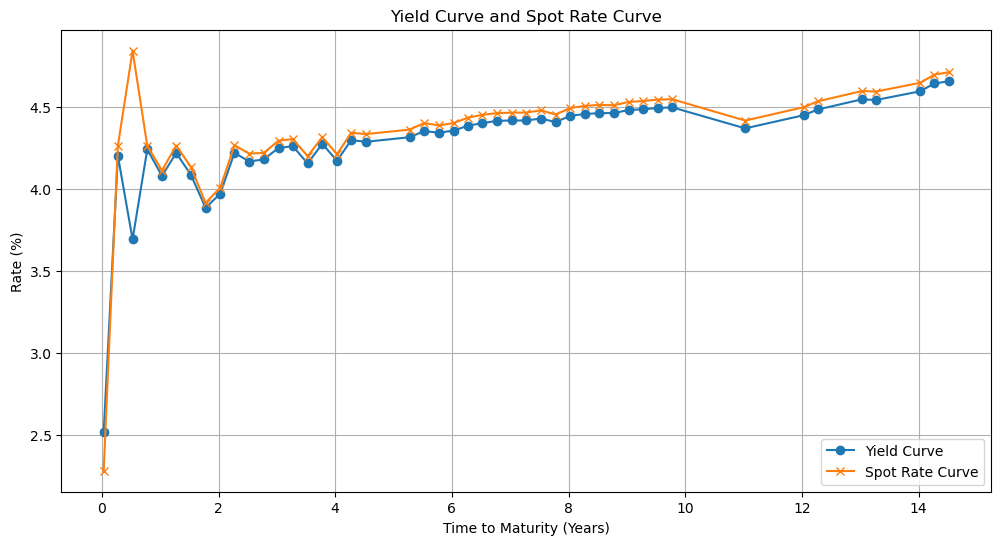

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(initial_time_to_maturity, initial_yield * 100, marker='o', label='Yield Curve')
plt.plot(initial_time_to_maturity, spot_rates * 100, marker='x', label='Spot Rate Curve')
plt.title('Yield Curve and Spot Rate Curve')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.show()